In [1]:
%%bash
pip install seaborn

In [3]:
# imports
import h2o 
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from h2o.estimators.gbm import H2OGradientBoostingEstimator 
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch

In [5]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,09 secs
H2O cluster version:,3.10.4.8
H2O cluster version age:,2 months and 16 days
H2O cluster name:,H2O_from_python_youdan_2i3vu4
H2O cluster total nodes:,1
H2O cluster free memory:,1.311 Gb
H2O cluster total cores:,1
H2O cluster allowed cores:,1
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [6]:
df = pd.read_csv("/home/youdan/Documents/Practicum/Encoding_Version4.csv", sep=',', encoding='latin-1')
df.head()

,Unnamed: 0,odid,display_name,od_name,production_year,running_time,sequel,opening_weekend_revenue,opening_weekend_theaters,maximum_theaters,...,rating.PG,rating.PG-13,rating.R,Rank.others.y,Rank.dir_100,Rank.dir_20,Rank.dir_200,Rank.dir_500,Rank.dir_900,Rank.others
0,1,10100,Titanic,Titanic,1997,194.0,0.0,28638131,2674,3265,...,0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,20100,The Dark Knight,Dark Knight The,2008,152.0,1.0,158411483,4366,4366,...,0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,30100,Star Wars Ep. IV: A New Hope,Star Wars Ep IV A New Hope,1977,119.0,0.0,1554475,43,2375,...,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,40100,Shrek 2,Shrek 2,2004,92.0,1.0,108037878,4163,4223,...,1,0,0,NaN,0.0,1.0,0.0,0.0,0.0,0.0
4,5,50100,ET: The Extra-Terrestrial,ET The Extra Terrestrial,1982,114.0,0.0,11911430,1101,3010,...,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [7]:
cols = list(df)
cols.insert(-1, cols.pop(cols.index('opening_weekend_revenue')))
cols
cols.insert(-1, cols.pop(cols.index('Rank.others')))
#cols

In [8]:
df = df.ix[:,cols]
df.head()

,Unnamed: 0,odid,display_name,od_name,production_year,running_time,sequel,opening_weekend_theaters,maximum_theaters,theatrical_engagements,...,rating.PG-13,rating.R,Rank.others.y,Rank.dir_100,Rank.dir_20,Rank.dir_200,Rank.dir_500,Rank.dir_900,Rank.others,opening_weekend_revenue
0,1,10100,Titanic,Titanic,1997,194.0,0.0,2674,3265,87202,...,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,28638131
1,2,20100,The Dark Knight,Dark Knight The,2008,152.0,1.0,4366,4366,39170,...,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,158411483
2,3,30100,Star Wars Ep. IV: A New Hope,Star Wars Ep IV A New Hope,1977,119.0,0.0,43,2375,43684,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1554475
3,4,40100,Shrek 2,Shrek 2,2004,92.0,1.0,4163,4223,33603,...,0,0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,108037878
4,5,50100,ET: The Extra-Terrestrial,ET The Extra Terrestrial,1982,114.0,0.0,1101,3010,62065,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11911430


In [9]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,odid,display_name,od_name,production_year,running_time,sequel,opening_weekend_theaters,maximum_theaters,theatrical_engagements,production_budget,...,rating.PG-13,rating.R,Rank.others.y,Rank.dir_100,Rank.dir_20,Rank.dir_200,Rank.dir_500,Rank.dir_900,Rank.others,opening_weekend_revenue
0,10100,Titanic,Titanic,1997,194.0,0.0,2674,3265,87202,200000000,...,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,28638131
1,20100,The Dark Knight,Dark Knight The,2008,152.0,1.0,4366,4366,39170,185000000,...,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,158411483
2,30100,Star Wars Ep. IV: A New Hope,Star Wars Ep IV A New Hope,1977,119.0,0.0,43,2375,43684,11000000,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1554475
3,40100,Shrek 2,Shrek 2,2004,92.0,1.0,4163,4223,33603,70000000,...,0,0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,108037878
4,50100,ET: The Extra-Terrestrial,ET The Extra Terrestrial,1982,114.0,0.0,1101,3010,62065,10500000,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11911430


In [10]:
df.to_csv('opening_weekend_revenue.csv')

In [11]:
path = '/home/youdan/Documents/Practicum/opening_weekend_revenue.csv'

In [12]:
frame = h2o.import_file(path=path) # multi-threaded import

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [13]:
frame.describe()

Rows:10594
Cols:60




,C1,odid,display_name,od_name,production_year,running_time,sequel,opening_weekend_theaters,maximum_theaters,theatrical_engagements,production_budget,domestic_box_office,international_box_office,inflation_adjusted_domestic_box_office,name_length,source_category.fiction_tale_novel,source_category.music_dance,source_category.original_screenplay,source_category.others,source_category.play_TV_movie_film,source_category.real_factual,source_category.NA,production_companies_size.Big_15,production_companies_size.Extra_small,production_companies_size.Large,production_companies_size.Medium,production_companies_size.NULL,production_companies_size.Others,production_companies_size.Small,Rank.others.x,Rank.act_1000,Rank.act_250,Rank.act_500.x,Rank.act_750,genre.Action,genre.Adventure,genre.Comedy,genre.Concert/Performance,genre.Documentary,genre.Drama,genre.Horror,genre.Musical,genre.Others,genre.Thriller/Suspense,genre.Western,rating.G,rating.NC-17,rating.Not Rated,rating.Open,rating.PG,rating.PG-13,rating.R,Rank.others.y,Rank.dir_100,Rank.dir_20,Rank.dir_200,Rank.dir_500,Rank.dir_900,Rank.others,opening_weekend_revenue
type,int,int,string,string,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int
mins,0.0,10100.0,NaN,NaN,1902.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,25.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,5296.5,115875216.10345477,NaN,NaN,2006.8768170662638,97.1203738317756,0.04843601895734597,690.8191429110826,770.4321313951297,3971.1731168586007,13874950.005663572,18817316.41891638,23700190.34523137,25434537.117141757,15.635831602794036,0.1363979611100623,0.003209363790824995,0.46913347177647724,0.033226354540305834,0.03162167264489334,0.18302812912969604,0.14338304700774024,0.15747103868054194,0.22364029059493418,0.34223443942666404,0.36756332220695076,0.029255841350873748,0.354408010995484,0.30335754957785194,0.9393130450258053,0.29115500978821857,0.29186688022779855,0.25093432995194875,0.2407901761879338,0.06248820086841608,0.04578063054559185,0.218331130828771,0.0047196526335661695,0.13045119879176892,0.30536152539173117,0.03804040022654333,0.009533698319803663,0.1129884840475741,0.0686237492920521,0.0036813290541816124,0.016518784217481593,0.001699074948083821,0.34642250330375685,0.0002831791580139702,0.08778553898433075,0.20237870492731735,0.34491221446101566,0.6189910979228487,0.05594207014056511,0.024563396279994317,0.04671304841686781,0.09456197643049835,0.05849779923328127,0.7197217094987931,5091609.640362451
maxs,10593.0,284460100.0,NaN,NaN,2017.0,600.0,1.0,4468.0,4468.0,87202.0,425000000.0,936662225.0,2023411357.0,3926220158.0,86.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,247966675.0
sigma,3058.36871005879,73795347.49056596,NaN,NaN,7.246012430689698,35.68271325565838,0.21469592487208042,1194.5515895877886,1211.0350312240892,7296.221585490208,32428855.81257,49544119.22891575,79907153.02579232,81581240.00872976,8.748804928832836,0.3432268597563215,0.056562936387576646,0.4990699029049416,0.17923558887256325,0.17499895204443025,0.38670783401998826,0.3504795909867218,0.36428006536298047,0.41672461972231983,0.4745042006820493,0.48218894479410784,0.16853935582423948,0.47838050394022985,0.4597534658832248,0.23877645434631053,0.4543352355118052,0.4546618451710317,0.4335893793321747,0.4276012246670089,0.24205155651442375,0.2090188707748133,0.4131328588104461,0.0685406518370333,0.3368150707554786,0.4605821190148933,0.19130285585735743,0.09717869280693708,0.31659366336356903,0.2528251648517537,0.06056503212180223,0.1274654762343041,0.041186748061616936,0.4758522107022408,0.016826339253588646

In [14]:
# split into 40% training, 30% validation, and 30% test
train, valid, test = frame.split_frame([0.4, 0.3])

In [15]:
y = 'opening_weekend_revenue'
X = [name for name in frame.columns if name not in ['Unnamed: 0 ', 'C1','odid', 'odname', 'domestic_box_office', 'international_box_office','inflation_adjusted_domestic_box_office',y]]
print(y)
print(X)

opening_weekend_revenue
['display_name', 'od_name', 'production_year', 'running_time', 'sequel', 'opening_weekend_theaters', 'maximum_theaters', 'theatrical_engagements', 'production_budget', 'name_length', 'source_category.fiction_tale_novel', 'source_category.music_dance', 'source_category.original_screenplay', 'source_category.others', 'source_category.play_TV_movie_film', 'source_category.real_factual', 'source_category.NA', 'production_companies_size.Big_15', 'production_companies_size.Extra_small', 'production_companies_size.Large', 'production_companies_size.Medium', 'production_companies_size.NULL', 'production_companies_size.Others', 'production_companies_size.Small', 'Rank.others.x', 'Rank.act_1000', 'Rank.act_250', 'Rank.act_500.x', 'Rank.act_750', 'genre.Action', 'genre.Adventure', 'genre.Comedy', 'genre.Concert/Performance', 'genre.Documentary', 'genre.Drama', 'genre.Horror', 'genre.Musical', 'genre.Others', 'genre.Thriller/Suspense', 'genre.Western', 'rating.G', 'rating.N

In [16]:
# random forest

# initialize rf model
rf_model = H2ORandomForestEstimator(
    ntrees=500,                      # Up to 500 decision trees in the forest 
    max_depth=30,                    # trees can grow to depth of 30
    stopping_rounds=5,               # stop after validation error does not decrease for 5 iterations/new trees
    score_each_iteration=True,       # score validation error on every iteration/new tree
    model_id='rf_model')             # for easy lookup in flow

# train rf model
rf_model.train(
    x=X,
    y=y,
    training_frame=train,
    validation_frame=valid)

# print model information
rf_model

# view detailed results at http://localhost:54321/flow/index.html

drf Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf_model


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 34607818501112.15
RMSE: 5882841.022933745
MAE: 1647684.9272670252
RMSLE: 2.818791222328682
Mean Residual Deviance: 34607818501112.15

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 24300695809457.008
RMSE: 4929573.593066342
MAE: 1513382.4422162815
RMSLE: 2.81374822408909
Mean Residual Deviance: 24300695809457.008
Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2017-08-07 09:15:34,0.036 sec,0.0,nan,nan,nan,nan,nan,nan
,2017-08-07 09:15:35,0.855 sec,1.0,9154746.2240146,2371653.4080773,83809378426108.8281250,8573941.5616231,2294922.9211737,73512473902128.6875000
,2017-08-07 09:15:36,1.250 sec,2.0,7938906.3394609,2141964.2275708,63026233866731.7968750,7223363.3386980,1990509.7226699,52176977922845.7890625
,2017-08-07 09:15:36,1.567 sec,3.0,8794673.1729721,2203175.5683318,77346276219395.5781250,7123727.9767424,1888675.5972102,50747500286622.7968750
,2017-08-07 09:15:36,1.877 sec,4.0,7694509.7691235,2107278.9743668,59205480587137.0234375,6507177.0121815,1795154.7827566,42343352667863.7109375
---,---,---,---,---,---,---,---,---,---
,2017-08-07 09:15:43,8.237 sec,31.0,6017176.4369054,1658208.5426003,36206412272849.3281250,4982966.9359597,1524729.8894579,24829959484867.5117188
,2017-08-07 09:15:43,8.424 sec,32.0,5901147.8734747,1641297.6409767,34823546224614.7382812,4967170.1666343,1520259.5877000,24672779464302.3007812
,2017-08-07 09:15:43,8.596 sec,33.0,5903738.6731293,1649194.9414868,34854130320602.2539062,4953532.2850890,1516578.2483477,24537482099419.2851562
,2017-08-07 09:15:43,8.806 sec,34.0,5896995.6444846,1647999.0730675,34774557631070.0976562,4948142.6388857,1515861.8061090,24484115574758.8828125



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
opening_weekend_theaters,6806490997619425280.0000000,1.0,0.2895520
maximum_theaters,6400149433144573952.0000000,0.9403009,0.2722660
theatrical_engagements,4916727927367794688.0000000,0.7223587,0.2091604
production_budget,2851806332619587584.0000000,0.4189833,0.1213174
running_time,369059942675513344.0000000,0.0542218,0.0157000
---,---,---,---
source_category.music_dance,107691850596352.0000000,0.0000158,0.0000046
source_category.NA,29776429449216.0000000,0.0000044,0.0000013
genre.Others,11880086110208.0000000,0.0000017,0.0000005
rating.NC-17,1067764613120.0000000,0.0000002,0.0000000



See the whole table with table.as_data_frame()


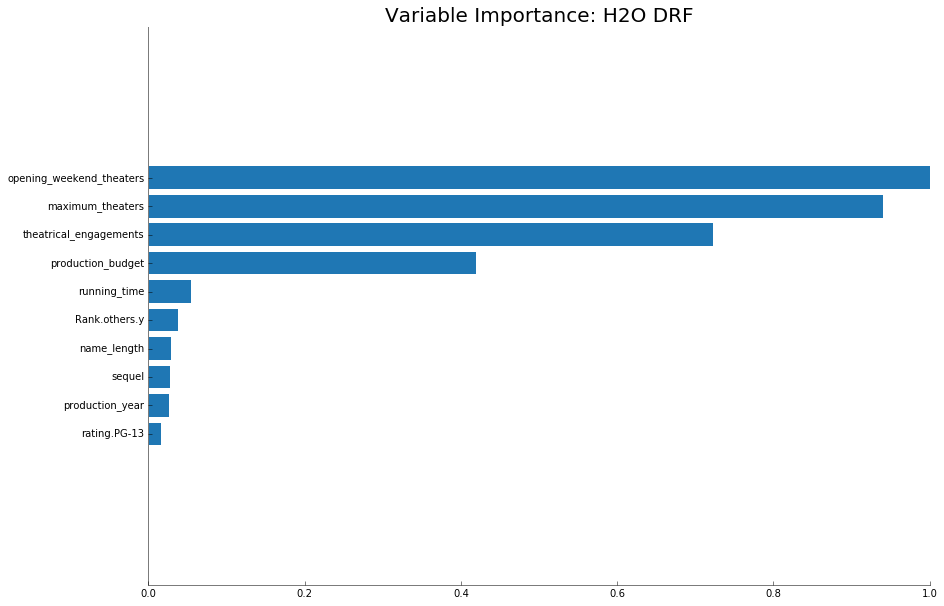

In [17]:
rf_model.varimp_plot(num_of_features=10)

In [18]:
test.head()

C1,odid,display_name,od_name,production_year,running_time,sequel,opening_weekend_theaters,maximum_theaters,theatrical_engagements,production_budget,domestic_box_office,international_box_office,inflation_adjusted_domestic_box_office,name_length,source_category.fiction_tale_novel,source_category.music_dance,source_category.original_screenplay,source_category.others,source_category.play_TV_movie_film,source_category.real_factual,source_category.NA,production_companies_size.Big_15,production_companies_size.Extra_small,production_companies_size.Large,production_companies_size.Medium,production_companies_size.NULL,production_companies_size.Others,production_companies_size.Small,Rank.others.x,Rank.act_1000,Rank.act_250,Rank.act_500.x,Rank.act_750,genre.Action,genre.Adventure,genre.Comedy,genre.Concert/Performance,genre.Documentary,genre.Drama,genre.Horror,genre.Musical,genre.Others,genre.Thriller/Suspense,genre.Western,rating.G,rating.NC-17,rating.Not Rated,rating.Open,rating.PG,rating.PG-13,rating.R,Rank.others.y,Rank.dir_100,Rank.dir_20,Rank.dir_200,Rank.dir_500,Rank.dir_900,Rank.others,opening_weekend_revenue
0,10100,Titanic,Titanic,1997,194,0,2674,3265,87202,2e+08,6.58672e+08,1.54894e+09,1.14735e+09,7,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,2.86381e+07
2,30100,Star Wars Ep. IV: A New Hope,Star Wars Ep IV A New Hope,1977,119,0,43,2375,43684,1.1e+07,4.60998e+08,3.256e+08,1.38531e+09,28,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1.55448e+06
10,110100,The Lord of the Rings: The Return of the King,Lord of the Rings The Return of the King The,2003,201,1,3703,3703,35419,9.4e+07,3.77846e+08,7.63557e+08,5.24449e+08,45,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,7.26297e+07
13,140100,Jurassic Park,Jurassic Park,1993,126,0,2404,2778,49159,6.3e+07,3.95708e+08,6.43104e+08,7.60803e+08,13,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,5.01595e+07
16,160100,Finding Nemo,Finding Nemo,2003,100,0,3374,3425,50008,9.4e+07,3.80529e+08,5.559e+08,5.18149e+08,12,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,7.02517e+07
22,220100,Iron Man,Iron Man,2008,126,0,4105,4154,33088,1.86e+08,3.18604e+08,2.66e+08,3.74051e+08,8,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1.02119e+08
24,240100,Indiana Jones and the Kingdom of the Crystal Skull,Indiana Jones and the Kingdom of the Crystal Skull,2008,123,1,4260,4264,29717,1.85e+08,3.17024e+08,4.69534e+08,3.72307e+08,50,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1.00138e+08
27,270100,Pirates of the Caribbean: At WorldÍs End,Pirates of the Caribbean At Worlds End,2007,167,1,4362,4362,26611,3e+08,3.0942e+08,6.54e+08,3.7913e+08,40,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1.14733e+08
29,300100,Pirates of the Caribbean: The Curse of the Black Pearl,Pirates of the Caribbean The Curse of the Black Pearl,2003,144,0,3269,3416,36876,1.25e+08,3.05411e+08,3.29543e+08,4.26968e+08,54,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,4.66307e+07
31,320100,The Sixth Sense,Sixth Sense The,1999,107,0,2161,2821,51740,4e+07,2.93506e+08,3.793e+08,4.85425e+08,15,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,nan,0,0,1,0,0,0,2.66813e+07


In [19]:
rf_predictions = rf_model.predict(test[:-1])

drf prediction progress: |████████████████████████████████████████████████| 100%


In [20]:
rf_predictions.head()

predict
6.14728e+07
3.70821e+06
7.58142e+07
2.53446e+07
5.86441e+07
8.25776e+07
1.3005e+08
1.76183e+08
8.02902e+07
2.1918e+07


In [21]:
print(rf_model.model_performance(test_data=test).r2())
print(rf_model.model_performance(test_data=test).mse())

0.830322902489848
32383674562601.453


In [22]:
test=test.cbind(rf_predictions)
test.head()

C1,odid,display_name,od_name,production_year,running_time,sequel,opening_weekend_theaters,maximum_theaters,theatrical_engagements,production_budget,domestic_box_office,international_box_office,inflation_adjusted_domestic_box_office,name_length,source_category.fiction_tale_novel,source_category.music_dance,source_category.original_screenplay,source_category.others,source_category.play_TV_movie_film,source_category.real_factual,source_category.NA,production_companies_size.Big_15,production_companies_size.Extra_small,production_companies_size.Large,production_companies_size.Medium,production_companies_size.NULL,production_companies_size.Others,production_companies_size.Small,Rank.others.x,Rank.act_1000,Rank.act_250,Rank.act_500.x,Rank.act_750,genre.Action,genre.Adventure,genre.Comedy,genre.Concert/Performance,genre.Documentary,genre.Drama,genre.Horror,genre.Musical,genre.Others,genre.Thriller/Suspense,genre.Western,rating.G,rating.NC-17,rating.Not Rated,rating.Open,rating.PG,rating.PG-13,rating.R,Rank.others.y,Rank.dir_100,Rank.dir_20,Rank.dir_200,Rank.dir_500,Rank.dir_900,Rank.others,opening_weekend_revenue,predict
0,10100,Titanic,Titanic,1997,194,0,2674,3265,87202,2e+08,6.58672e+08,1.54894e+09,1.14735e+09,7,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,2.86381e+07,6.14728e+07
2,30100,Star Wars Ep. IV: A New Hope,Star Wars Ep IV A New Hope,1977,119,0,43,2375,43684,1.1e+07,4.60998e+08,3.256e+08,1.38531e+09,28,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1.55448e+06,3.70821e+06
10,110100,The Lord of the Rings: The Return of the King,Lord of the Rings The Return of the King The,2003,201,1,3703,3703,35419,9.4e+07,3.77846e+08,7.63557e+08,5.24449e+08,45,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,7.26297e+07,7.58142e+07
13,140100,Jurassic Park,Jurassic Park,1993,126,0,2404,2778,49159,6.3e+07,3.95708e+08,6.43104e+08,7.60803e+08,13,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,5.01595e+07,2.53446e+07
16,160100,Finding Nemo,Finding Nemo,2003,100,0,3374,3425,50008,9.4e+07,3.80529e+08,5.559e+08,5.18149e+08,12,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,7.02517e+07,5.86441e+07
22,220100,Iron Man,Iron Man,2008,126,0,4105,4154,33088,1.86e+08,3.18604e+08,2.66e+08,3.74051e+08,8,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1.02119e+08,8.25776e+07
24,240100,Indiana Jones and the Kingdom of the Crystal Skull,Indiana Jones and the Kingdom of the Crystal Skull,2008,123,1,4260,4264,29717,1.85e+08,3.17024e+08,4.69534e+08,3.72307e+08,50,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1.00138e+08,1.3005e+08
27,270100,Pirates of the Caribbean: At WorldÍs End,Pirates of the Caribbean At Worlds End,2007,167,1,4362,4362,26611,3e+08,3.0942e+08,6.54e+08,3.7913e+08,40,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1.14733e+08,1.76183e+08
29,300100,Pirates of the Caribbean: The Curse of the Black Pearl,Pirates of the Caribbean The Curse of the Black Pearl,2003,144,0,3269,3416,36876,1.25e+08,3.05411e+08,3.29543e+08,4.26968e+08,54,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,4.66307e+07,8.02902e+07
31,320100,The Sixth Sense,Sixth Sense The,1999,107,0,2161,2821,51740,4e+07,2.93506e+08,3.793e+08,4.85425e+08,15,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,nan,0,0,1,0,0,0,2.66813e+07,2.1918e+07


In [23]:
test_df=test.as_data_frame()
result = test_df.sort_values(['predict'],ascending=False)
result1 = result.reset_index(drop= True)
result1.head()

,C1,odid,display_name,od_name,production_year,running_time,sequel,opening_weekend_theaters,maximum_theaters,theatrical_engagements,...,rating.R,Rank.others.y,Rank.dir_100,Rank.dir_20,Rank.dir_200,Rank.dir_500,Rank.dir_900,Rank.others,opening_weekend_revenue,predict
0,27,270100,Pirates of the Caribbean: At WorldÍs End,Pirates of the Caribbean At Worlds End,2007,167.0,1.0,4362,4362,26611,...,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,114732820,1.761829e+08
1,8611,196380100,Batman v Superman: Dawn of Justice,Batman v Superman Dawn of Justice,2015,151.0,1.0,4242,4256,25005,...,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,166007347,1.455466e+08
2,24,240100,Indiana Jones and the Kingdom of the Crystal S...,Indiana Jones and the Kingdom of the Crystal S...,2008,123.0,1.0,4260,4264,29717,...,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,100137835,1.300498e+08
3,5886,109670100,The Twilight Saga: Eclipse,Twilight Saga Eclipse The,2010,124.0,1.0,4468,4468,24760,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,64832191,1.280194e+08
4,6101,125920100,The Amazing Spider-Man,Amazing Spider Man The,2012,136.0,1.0,4318,4318,22495,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,62004688,1.250429e+08


In [24]:
newdf = result1[result1.columns[59:61]]
newdf.head()

,opening_weekend_revenue,predict
0,114732820,1.761829e+08
1,166007347,1.455466e+08
2,100137835,1.300498e+08
3,64832191,1.280194e+08
4,62004688,1.250429e+08


In [25]:
%matplotlib inline

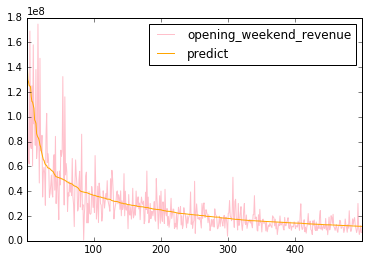

In [26]:
newdf[1:500].plot(color=['pink','orange'])

In [27]:
h2o.cluster().shutdown(prompt=False)

H2O session _sid_9c97 closed.
